In [37]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as la
import json
import sys
import matplotlib.gridspec as gridspec
import os

sys.path.append("..")
plt.rcParams['font.family'] = 'serif'
plt.rcParams.update({'font.size': 11})

DATA = '../submission_data/oct_30'

This notebook contains an expanded version of the public image generator notebook. Some additional plots of the FFT of the error as a function of time (to determine periodicity) and a horizontal version of the runtime benchmark can be found here.

[64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144, 524288, 1048576, 2097152, 4194304, 8388608, 16777216, 33554432]
[0.041181421279907225, 0.0335963249206543, 0.034451961517333984, 0.041766786575317384, 0.043706512451171874, 0.04506649971008301, 0.04906330108642578, 0.07493529319763184, 0.08103508949279785, 0.06856884956359863, 0.07047796249389648, 0.07417354583740235, 0.14077095985412597, 0.1562969207763672, 0.17615461349487305, 0.17706775665283203, 0.18846392631530762, 0.2189345359802246, 0.26348209381103516, 0.31090664863586426]


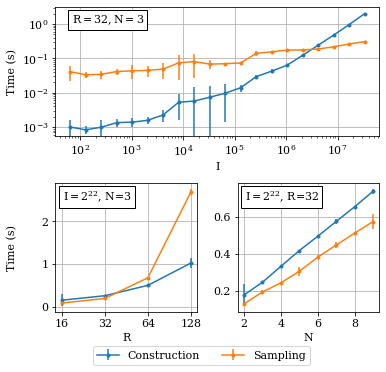

In [38]:
data = None
with open(f"{DATA}/runtime_bench.json") as f:
    data = json.load(f)

I_values = [el["I"] for el in data["I_trace"]]
I_con_times = [np.mean(el["construction_times"]) for el in data["I_trace"]]
I_sampling_times = [np.mean(el["sampling_times"]) for el in data["I_trace"]]
I_con_errs = np.array([np.std(el["construction_times"]) for el in data["I_trace"]])
I_sampling_errs = np.array([np.std(el["sampling_times"]) for el in data["I_trace"]])


R_values = [el["R"] for el in data["R_trace"]]
R_con_times = [np.mean(el["construction_times"]) for el in data["R_trace"]]
R_sampling_times = [np.mean(el["sampling_times"]) for el in data["R_trace"]]
R_con_errs = np.array([np.std(el["construction_times"]) for el in data["R_trace"]])
R_sampling_errs = np.array([np.std(el["sampling_times"]) for el in data["R_trace"]])

N_values = [el["N"] for el in data["N_trace"]]
N_con_times = [np.mean(el["construction_times"]) for el in data["N_trace"]]
N_sampling_times = [np.mean(el["sampling_times"]) for el in data["N_trace"]]
N_con_errs = np.array([np.std(el["construction_times"]) for el in data["N_trace"]])
N_sampling_errs = np.array([np.std(el["sampling_times"]) for el in data["N_trace"]])

fig = plt.figure(tight_layout=True, figsize=(5.5,5))
gs = gridspec.GridSpec(2, 2)

ax = fig.add_subplot(gs[0, :])
ax.set_xscale("log")
ax.set_yscale("log")
ax.grid(True)
ax.errorbar(I_values, I_con_times, 3 * I_con_errs, fmt='-o', label="Construction", markersize=3)
ax.errorbar(I_values, I_sampling_times, 3 * I_sampling_errs, fmt='-o', label="Sampling", markersize=3)
props = dict(boxstyle='square', facecolor='white', alpha=1.0)
ax.text(0.05, 0.95, '$\mathregular{R=32, N=3}$', transform=ax.transAxes, fontsize=11,
        verticalalignment='top',bbox=props)

ax.set_ylabel('Time (s)')
ax.set_xlabel('I')

for i in range(2):
    ax = fig.add_subplot(gs[1, i])
    ax.grid(True)
    if i == 0:
        ax.set_xscale('log')
        ax.set_ylabel('Time (s)')
        ax.errorbar(R_values, R_con_times, 3 * R_con_errs, fmt='-o', markersize=3)
        ax.errorbar(R_values, R_sampling_times, 3 * R_sampling_errs, fmt='-o', markersize=3)
        ax.set_xlabel('R')
        ax.set_xticks(R_values)
        ax.minorticks_off()
        ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
        ax.text(0.05, 0.95, '$\mathregular{I=2^{22}}$, N=3', transform=ax.transAxes, fontsize=11,
        verticalalignment='top',bbox=props)
    if i == 1:
        ax.text(0.05, 0.95, '$\mathregular{I=2^{22}}$, R=32', transform=ax.transAxes, fontsize=11,
        verticalalignment='top',bbox=props)
        ax.errorbar(N_values, N_con_times, 3 * N_con_errs, fmt='-o', markersize=3)
        ax.errorbar(N_values, N_sampling_times, 3 * N_sampling_errs, fmt='-o', markersize=3)
        ax.set_xticks([2, 4, 6, 8])
        ax.set_xlabel('N')
        
fig.align_labels()
fig.legend(bbox_to_anchor=(0.8085, 0.04), ncol=5)
fig.savefig("paper_images/runtime_benchmark.pdf", bbox_inches='tight')
plt.show()

In [39]:
def get_data(files):
    data = []
    for filepath in files:
        with open(filepath, 'r') as infile:
            data_file = json.load(infile)
            data.extend(data_file)
        
    return data

uber_files = [f'{DATA}/uber_sparse_traces1.json',
             f'{DATA}/uber_traces_exact.json']
uber_data = get_data(uber_files)

enron_files = [f'{DATA}/enron_sparse_traces.json',
               f'{DATA}/enron_traces_exact.json']
enron_data = get_data(enron_files)

nell2_files = [f'{DATA}/nell-2_sparse_traces1.json',
              f'{DATA}/nell-2_sparse_traces2.json',
              f'{DATA}/nell2_traces_exact.json']
nell2_data = get_data(nell2_files)

amazon_files = [f'{DATA}/amazon-reviews_sparse_traces1.json',
               f'{DATA}/amazon-reviews_sparse_traces2.json',
               f'{DATA}/amazon-reviews_sparse_traces3.json',
                f'{DATA}/amazon_traces_exact.json'
               ]
amazon_data = get_data(amazon_files)
    
reddit_files = [f'{DATA}/reddit-2015_sparse_traces1.json',
               f'{DATA}/reddit-2015_sparse_traces2.json',
               f'{DATA}/reddit-2015_sparse_traces3.json',
               f'{DATA}/reddit-2015_traces_exact.json']
reddit_data = get_data(reddit_files)


sample_counts = [2 ** 16] 
R_values = [25, 50, 75, 100, 125]        

def process_data(data):     
    samplers = ["larsen_kolda", "larsen_kolda_hybrid", "efficient", "exact"]

    trial_dict = {}
    for trial in data:
        key = (trial['R'], trial['sampler'])
        if key not in trial_dict:
            trial_dict[key] = []

        trial_dict[key].append(trial)

    data_points = {"larsen_kolda": ([], [], []), 
                   "larsen_kolda_hybrid": ([], [], []), 
                    "efficient": ([], [], []),
                    "exact": ([], [], []) 
                  }
    
    for key in trial_dict.keys():
        trials = trial_dict[key]
        max_fits = []
        for trial in trials:
            max_fits.append(np.max(trial['trace']['fits']))

        mean_fit = np.mean(max_fits)
        std_fit = np.std(max_fits)

        y_position = key[0]

        data_points[key[1]][0].append(mean_fit)
        data_points[key[1]][1].append(y_position)
        data_points[key[1]][2].append(3 * std_fit)
        
    return data_points

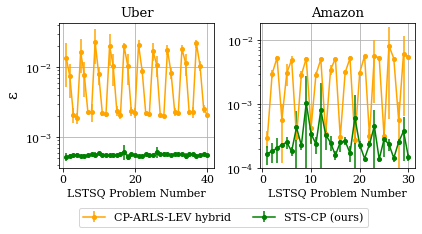

In [40]:
def generate_plot(ax, filename, label_fig=False):
    traces = {}

    samplers = ["larsen_kolda_hybrid", "efficient"]
    plot_map = {"larsen_kolda_hybrid": ("CP-ARLS-LEV hybrid", "orange"), "efficient": ("STS-CP (ours)", "green")}

    with open(filename, 'r') as f:
        data = json.load(f)

        for sampler in samplers:
            traces[sampler] =  [[measurement["ratio"] for measurement in trace] for trace in data[sampler]]

    x_axis = [el + 1 for el in list(range(len(traces[samplers[0]][0])))]
    
    for sampler in samplers:
        trace_array = np.array(traces[sampler])
        mean_trace = np.mean(trace_array, axis=0)
        std_trace = np.std(trace_array, axis=0)
        traces[sampler] = [mean_trace, std_trace]
    
    for sampler in samplers:
        mean_trace, std_trace = traces[sampler]
        first=True
        label="_" + plot_map[sampler][0]
        if first:
            first = False
            label = label[1:]
        color = plot_map[sampler][1]
        if not label_fig:
            label = '_' + label
        #ax.plot(x_axis, mean_trace-1, '-o', c=color,label=label, markersize=4.0)
        ax.errorbar(x_axis, mean_trace-1, std_trace,fmt='-o', c=color,label=label, markersize=4.0)

filename = f'{DATA}/amazon-reviews_exact_solve_comp_1_extended.json'

fig = plt.figure(tight_layout=True, figsize=(6,3))
gs = gridspec.GridSpec(1,2)
ax1 = fig.add_subplot(gs[0, 1])
generate_plot(ax1, filename)

#ax1.legend()
ax1.set_title("Amazon")
ax1.grid(True)
ax1.set_yscale("log")
#ax.set_title(title)
ax1.set_ylim([0.0001, 0.019])
ax1.set_xlabel("LSTSQ Problem Number")

filename = f'{DATA}/uber_exact_solve_comp_1.json'
ax2 = fig.add_subplot(gs[0, 0])
generate_plot(ax2, filename, label_fig=True)

ax2.grid(True)
#ax2.set_ylim([-0.0005, 0.029])
ax2.set_xlabel("LSTSQ Problem Number")
ax2.set_ylabel(r"$\mathregular{\varepsilon}$", fontsize=15)
ax2.set_title("Uber")
ax2.set_yscale("log")
fig.legend(bbox_to_anchor=(0.875, 0.04), ncol=5)
fig.savefig("paper_images/epsilon_progression.pdf",bbox_inches='tight')
plt.show()

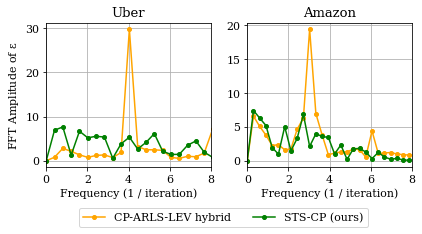

In [41]:
def generate_frequency_plot(ax, filename, label_fig=False):
    traces = {}

    samplers = ["larsen_kolda_hybrid", "efficient"]
    plot_map = {"larsen_kolda_hybrid": ("CP-ARLS-LEV hybrid", "orange"), "efficient": ("STS-CP (ours)", "green")}

    with open(filename, 'r') as f:
        data = json.load(f)

        for sampler in samplers:
            traces[sampler] =  [[measurement["ratio"] for measurement in trace] for trace in data[sampler]]

    x_axis = [el + 1 for el in list(range(len(traces[samplers[0]][0])))]
    
    for sampler in samplers:
        trace_array = np.array(traces[sampler])
        mean_trace = np.mean(trace_array, axis=0)
        traces[sampler] = [mean_trace]
    
    for sampler in samplers:
        first=True
        for el in traces[sampler]:
            label="_" + plot_map[sampler][0]
            if first:
                first = False
                label = label[1:]
            color = plot_map[sampler][1]
            if not label_fig:
                label = '_' + label
                
            original_data = np.array(el) - 1
            
            n_interp = 100
            x_interp = np.linspace(0, x_axis[-1], n_interp)
            interp = np.interp(x_interp, x_axis, original_data)
            
            N = len(x_interp)
            rescaled_data = interp - np.mean(interp)
            rescaled_data /= np.max(np.abs(rescaled_data))
            
            freq = x_interp
            signal = np.abs(np.fft.fft(rescaled_data))
            ax.plot(freq[:N//2] * n_interp / 100, signal[:N//2], '-o', c=color,label=label, markersize=4.0)
            ax.set_xlim([0, 8])
            
filename = f'{DATA}/amazon-reviews_exact_solve_comp_1_extended.json'

fig = plt.figure(tight_layout=True, figsize=(6,3))
gs = gridspec.GridSpec(1,2)
ax1 = fig.add_subplot(gs[0, 1])
generate_frequency_plot(ax1, filename)

ax1.set_title("Amazon")
ax1.grid(True)
ax1.set_xlabel("Frequency (1 / iteration)")

filename = f'{DATA}/uber_exact_solve_comp_1.json'
ax2 = fig.add_subplot(gs[0, 0])
generate_frequency_plot(ax2, filename, label_fig=True)

ax2.grid(True)
ax2.set_xlabel("Frequency (1 / iteration)")
ax2.set_ylabel(r"FFT Amplitude of $\mathregular{\varepsilon}$", fontsize=11)
ax2.set_title("Uber")
fig.legend(bbox_to_anchor=(0.875, 0.04), ncol=5)
fig.savefig("paper_images/epsilon_fft.pdf",bbox_inches='tight')
plt.show()

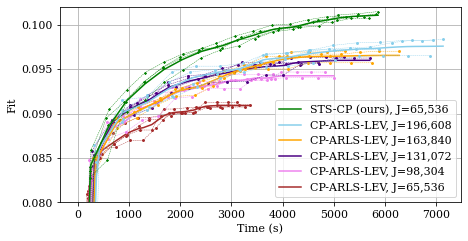

In [42]:
reddit_time_trace_files = [f'{DATA}/reddit-2015_time_comparison1.json',
                           f'{DATA}/reddit-2015_time_comparison2.json']
reddit_time_traces = get_data(reddit_time_trace_files)

reddit_efficient_files = [f'{DATA}/reddit-2015_time_comparison_efficient.json']
reddit_efficient_traces = get_data(reddit_efficient_files)

def get_time_update_pairs(result):
    trace = result["trace"]
    order = result["tensor_order"]
    prefix_sum = np.cumsum(trace["update_times"])
    iterations = trace["iterations"]
    fits = np.maximum(trace["fits"], 0.0)
    max_fits = []
    fit_computation_epoch = iterations[1] - iterations[0]
    times = [0.0]
    for i in range(order * fit_computation_epoch, len(prefix_sum)+1, order * fit_computation_epoch):
        times.append(prefix_sum[i-1])
    
    for fit in fits:
        if len(max_fits) == 0 or max_fits[-1] < fit:
            max_fits.append(fit)
        else:
            max_fits.append(max_fits[-1])
    
    return times, max_fits

def filter_data(results, J):
    return [el for el in results if el["J"] == J]

dataset = reddit_time_traces
efficient_dataset = reddit_efficient_traces
J_values = sorted(list(dict.fromkeys([el['J'] for el in dataset])))
J_values_efficient = sorted(list(dict.fromkeys([el['J'] for el in efficient_dataset])))
colors={J_values[0]: 'brown', J_values[1]: 'violet', J_values[2]:'indigo', J_values[3]:'orange', J_values[4]:'skyblue'}
colors_efficient={J_values[0]: 'green'}

sf=0.9
fig, ax = plt.subplots(figsize=(8*sf,4*sf))
ax.grid(True)
ax.set_xlabel("Time (s)")
ax.set_ylabel("Fit")
ax.set_ylim(0.08, 0.102)
#ax.set_ylim(0.20, 0.23)

for J in J_values:
    results = filter_data(dataset, J)
    max_time = max([get_time_update_pairs(result)[0][-1] for result in results])
    x = np.linspace(0.0, max_time, num=10000)
    
    interp_y = []
    for result in results:
        times, fits = get_time_update_pairs(result)
        ax.plot(times, fits, '--o', linewidth=0.4, markersize=1.9, c=colors[J])
        interp_y.append(np.interp(x, times, fits))
    mean_y = np.mean(interp_y, axis=0)
    ax.plot(x, mean_y, c=colors[J],label=f"CP-ARLS-LEV, J={J:,}")
    
    
for J in J_values_efficient:
    results = filter_data(efficient_dataset, J)
    max_time = max([get_time_update_pairs(result)[0][-1] for result in results])
    x = np.linspace(0.0, max_time, num=10000)
    
    interp_y = []
    for result in results:
        times, fits = get_time_update_pairs(result)
        ax.plot(times, fits, '--*', linewidth=0.4, markersize=1.9, c=colors_efficient[J])
        interp_y.append(np.interp(x, times, fits))
    mean_y = np.mean(interp_y, axis=0)
    ax.plot(x, mean_y, c=colors_efficient[J],label=f"STS-CP (ours), J={J:,}")

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1])
fig.savefig("paper_images/reddit_time_plot.pdf",bbox_inches='tight')

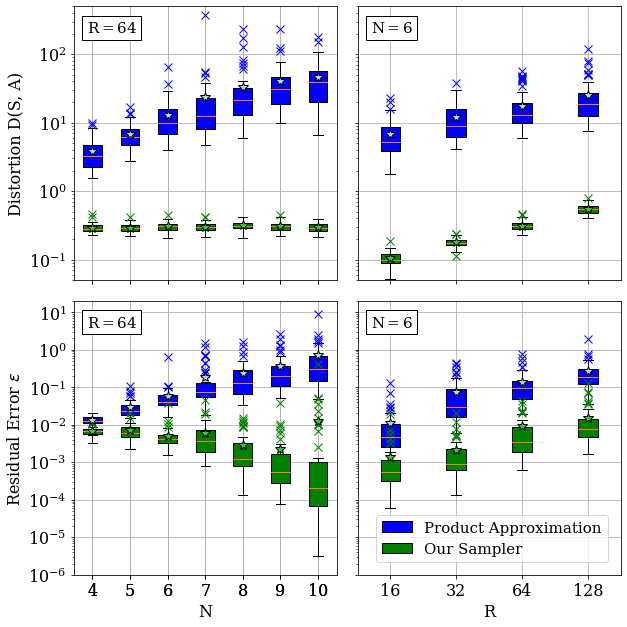

In [43]:
plt.rcParams.update({'font.size': 16})

scale=2
fig = plt.figure(tight_layout=True, figsize=(4.5*scale,4.5*scale))
gs = gridspec.GridSpec(2,2)

ax1 = fig.add_subplot(gs[1, 0])
ax2 = fig.add_subplot(gs[1, 1])
ax3 = fig.add_subplot(gs[0, 0])
ax4 = fig.add_subplot(gs[0, 1])

lk_c = 'blue'
our_c = 'green'

with open(f"{DATA}/accuracy_bench.json", "r") as infile:
#with open("/pscratch/sd/v/vbharadw/fast_tensor_leverage/outputs/accuracy_bench3.json", "r") as infile:
    data = json.load(infile)
    N_values = [int(key) + 1 for key in data['N_trace'].keys()]
    N_eps_lk = [np.array(data['N_trace'][key]["larsen_kolda"])-1 for key in data['N_trace'].keys()]
    N_eps_efficient = [np.array(data['N_trace'][key]["efficient"])-1 for key in data['N_trace'].keys()]
    
    flierprops_lk = dict(marker='x', markeredgecolor=lk_c, markersize=8, linestyle="None")
    meanprops_lk = dict(marker='*', markerfacecolor='lightblue', markeredgecolor='black', markersize=10, linestyle="None")
    
    flierprops_ours = dict(marker='x', markeredgecolor=our_c, markersize=8, linestyle="None")
    meanprops_ours = dict(marker='*', markerfacecolor='limegreen', markeredgecolor='black', markersize=10, linestyle="None")
    
    plot1 = ax1.boxplot(N_eps_lk, positions=N_values, patch_artist=True, flierprops=flierprops_lk, showmeans=True, meanprops=meanprops_lk)
    plot2 = ax1.boxplot(N_eps_efficient, positions=N_values, patch_artist=True, flierprops=flierprops_ours, showmeans=True, meanprops=meanprops_ours)
    
    plots = [plot1, plot2]
    colors = [lk_c, our_c]
    for i in [0, 1]:
        bplot, color = plots[i], colors[i]
        for patch in bplot['boxes']:
            patch.set_facecolor(color)
    
    ax1.set_yscale('log')
    ax1.grid(True)
    
    R_values = np.array([int(key) for key in data['R_trace'].keys()])
    R_eps_lk = [np.array(data['R_trace'][key]["larsen_kolda"])-1 for key in data['R_trace'].keys()]
    R_eps_efficient = [np.array(data['R_trace'][key]["efficient"])-1 for key in data['R_trace'].keys()]
    
    width = 0.3
    plot1 = ax2.boxplot(R_eps_lk, positions=np.log(R_values) / np.log(2), patch_artist=True, flierprops=flierprops_lk, widths=[width] * 4, showmeans=True, meanprops=meanprops_lk)
    plot2 = ax2.boxplot(R_eps_efficient, positions=np.log(R_values) / np.log(2), patch_artist=True, flierprops=flierprops_ours, widths=[width] * 4, showmeans=True, meanprops=meanprops_ours)
    
    plots = [plot1, plot2]
    colors = [lk_c, our_c]
    for i in [0, 1]:
        bplot, color = plots[i], colors[i]
        for patch in bplot['boxes']:
            patch.set_facecolor(color)
    
with open(f"{DATA}/accuracy_bench3.json", "r") as infile:
    data = json.load(infile)
    N_values = [int(key) + 1 for key in data['N_trace'].keys()]
    N_eps_lk = [np.array(data['N_trace'][key]["larsen_kolda"])-1 for key in data['N_trace'].keys()]
    N_eps_efficient = [np.array(data['N_trace'][key]["efficient"])-1 for key in data['N_trace'].keys()]
    
    flierprops_lk = dict(marker='x', markeredgecolor=lk_c, markersize=8, linestyle="None")
    meanprops_lk = dict(marker='*', markerfacecolor='lightblue', markeredgecolor='black', markersize=10, linestyle="None")
    
    flierprops_ours = dict(marker='x', markeredgecolor=our_c, markersize=8, linestyle="None")
    meanprops_ours = dict(marker='*', markerfacecolor='limegreen', markeredgecolor='black', markersize=10, linestyle="None")
    
    plot1 = ax3.boxplot(N_eps_lk, positions=N_values, patch_artist=True, flierprops=flierprops_lk, showmeans=True, meanprops=meanprops_lk)
    plot2 = ax3.boxplot(N_eps_efficient, positions=N_values, patch_artist=True, flierprops=flierprops_ours, showmeans=True, meanprops=meanprops_ours)
    
    plots = [plot1, plot2]
    colors = [lk_c, our_c]
    for i in [0, 1]:
        bplot, color = plots[i], colors[i]
        for patch in bplot['boxes']:
            patch.set_facecolor(color)
    
    ax3.set_yscale('log')
    ax3.grid(True)
    
    R_values = np.array([int(key) for key in data['R_trace'].keys()])
    R_eps_lk = [np.array(data['R_trace'][key]["larsen_kolda"])-1 for key in data['R_trace'].keys()]
    R_eps_efficient = [np.array(data['R_trace'][key]["efficient"])-1 for key in data['R_trace'].keys()]
    
    width = 0.3
    plot1 = ax4.boxplot(R_eps_lk, positions=np.log(R_values) / np.log(2), patch_artist=True, flierprops=flierprops_lk, widths=[width] * 4, showmeans=True, meanprops=meanprops_lk)
    plot2 = ax4.boxplot(R_eps_efficient, positions=np.log(R_values) / np.log(2), patch_artist=True, flierprops=flierprops_ours, widths=[width] * 4, showmeans=True, meanprops=meanprops_ours)
    
    plots = [plot1, plot2]
    colors = [lk_c, our_c]
    for i in [0, 1]:
        bplot, color = plots[i], colors[i]
        for patch in bplot['boxes']:
            patch.set_facecolor(color)
            
ax2.set_yscale('log')
ax4.set_yscale('log')
ax2.grid(True)
ax4.grid(True)
ax1.sharex(ax3)
ax2.sharex(ax4)
    
ax4.set_xticks([4, 5, 6, 7], labels=[16, 32, 64, 128])
    
ax1.set_ylabel(r"Residual Error $\epsilon$", fontsize=16)
ax3.set_ylabel(r"Distortion D(S, A)", fontsize=16)
props = dict(boxstyle='square', facecolor='white', alpha=1.0)
ax1.text(0.05, 0.95, '$\mathregular{R=64}$', transform=ax1.transAxes, fontsize=15,verticalalignment='top',bbox=props)
ax2.text(0.05, 0.95, '$\mathregular{N=6}$', transform=ax2.transAxes, fontsize=15,verticalalignment='top',bbox=props)
ax3.text(0.05, 0.95, '$\mathregular{R=64}$', transform=ax3.transAxes, fontsize=15,verticalalignment='top',bbox=props)
ax4.text(0.05, 0.95, '$\mathregular{N=6}$', transform=ax4.transAxes, fontsize=15,verticalalignment='top',bbox=props)
ax1.set_ylim(1e-6,20)
ax3.set_ylim(5e-2,500)
ax4.sharey(ax3)
ax2.sharey(ax1)

for ax in [ax1, ax2, ax3, ax4]:
    ax.label_outer()
    
ax1.set_xlabel("N")
ax2.set_xlabel("R")
    
fig.show()
fig.legend([plot1["boxes"][0], plot2["boxes"][0]], ['Product Approximation', 'Our Sampler'], bbox_to_anchor=(0.965, 0.20), ncol=1, fontsize=15)
fig.savefig("paper_images/distortion.pdf",bbox_inches='tight')

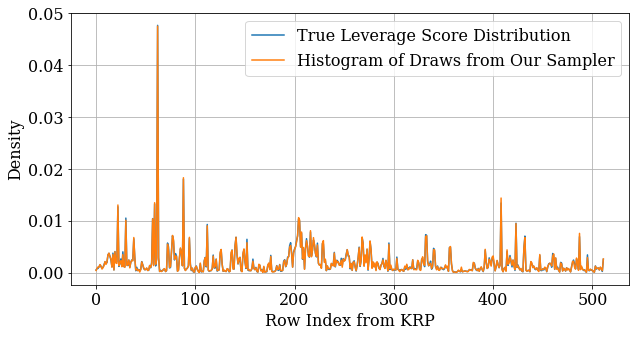

In [44]:
with open(f"{DATA}/distribution_comparison.json", "r") as infile:
    result = json.load(infile)
    N = result["N"]
    I = result["I"]
    J = result["J"]
    krp_height = I ** N
    
    true_distribution = result['true_distribution']
    sts_sampler_draws = np.array(result['sts_sampler_draws']).astype(np.int32)
    bins = np.array(np.bincount(sts_sampler_draws, minlength=krp_height)) / len(sts_sampler_draws)
    
    scale=5
    fig, ax = plt.subplots(figsize=(2 * scale,1 * scale))
    ax.plot(true_distribution / np.sum(true_distribution), label="True Leverage Score Distribution")
    ax.plot(bins, label=f"Histogram of Draws from Our Sampler")
    ax.grid(True)
    ax.set_xlabel("Row Index from KRP")
    ax.set_ylabel("Density")
    ax.legend()
    fig.show()
    fig.savefig("paper_images/distribution_comparison.pdf",bbox_inches='tight')

In [45]:
# Generates a table with all of the data from the accuracy comparison
data = {"Uber": uber_data, 
        "Enron": enron_data, 
        "NELL-2": nell2_data, 
        "Amazon": amazon_data, 
        "Reddit": reddit_data}

samplers = ["larsen_kolda", "larsen_kolda_hybrid", "efficient", "exact"]
sampler_real_names = {"larsen_kolda": "CP-ARLS-LEV", 
                      "larsen_kolda_hybrid": "CP-ARLS-LEV-H",
                      "efficient": "STS-CP (ours)",
                      "exact": "Exact"}

for key in data:
    data[key] = process_data(data[key])
    
    for sampler in data[key]:
        means, ranks, stds = data[key][sampler]
        sampler_dict = {}
        for i in range(len(means)):
            sampler_dict[ranks[i]] = (means[i], stds[i])
            
        data[key][sampler] = sampler_dict
    
datasets = list(data.keys())

ranks = sorted(list(data[datasets[0]]['larsen_kolda'].keys()))
num_ranks = len(ranks)

row_count = len(datasets) * num_ranks + 1
col_count = len(samplers) + 2

table = [["" for _ in range(col_count)] for _ in range(row_count)]

# Header:
table[0][0], table[0][1] = "Tensor", "$R$"
for i in range(2, col_count):
    table[0][i] = sampler_real_names[samplers[i-2]]
    
for i in range(1, row_count):
    dataset = datasets[(i - 1) // num_ranks]
    rank_idx = (i - 1) % num_ranks
    if rank_idx == 0:
        table[i][0] = "\multirow{" + f"{num_ranks}" + "}{*}{" + dataset + "}"
        
    table[i][1] = f"{ranks[rank_idx]}"
    
    for j in range(len(samplers)):
        sampler = samplers[j]
        mean, std = data[dataset][sampler][ranks[rank_idx]]
        mean_string = f'{mean:#.3g}'.lstrip('0')
        if sampler == "efficient":
            table[i][2 + j] = f"\\textbf{{{mean_string}}} $\pm$ {std:.2e}"
        else:
            table[i][2 + j] = f"{mean_string} $\pm$ {std:.2e}"
    
lines = ['\t& '.join(lst) for lst in table]
lines = [line + "\t\\\\" for line in lines]
lines.insert(0, "\\\\\n\\toprule")
lines.insert(2, "\\midrule")
for i in range(len(samplers) + 1):
    lines.insert((num_ranks) * (i+1) + 3 + i, '\\midrule')

lines.insert(len(lines), "\\bottomrule")
print("\n".join(lines))

\\
\toprule
Tensor	& $R$	& CP-ARLS-LEV	& CP-ARLS-LEV-H	& STS-CP (ours)	& Exact	\\
\midrule
\multirow{5}{*}{Uber}	& 25	& .187 $\pm$ 2.30e-03	& .188 $\pm$ 2.11e-03	& \textbf{.189} $\pm$ 1.52e-03	& .190 $\pm$ 1.41e-03	\\
	& 50	& .211 $\pm$ 1.72e-03	& .212 $\pm$ 1.27e-03	& \textbf{.216} $\pm$ 1.18e-03	& .218 $\pm$ 1.61e-03	\\
	& 75	& .218 $\pm$ 1.76e-03	& .218 $\pm$ 2.05e-03	& \textbf{.230} $\pm$ 9.24e-04	& .232 $\pm$ 9.29e-04	\\
	& 100	& .217 $\pm$ 3.15e-03	& .217 $\pm$ 1.69e-03	& \textbf{.237} $\pm$ 2.12e-03	& .241 $\pm$ 1.00e-03	\\
	& 125	& .213 $\pm$ 1.96e-03	& .213 $\pm$ 2.47e-03	& \textbf{.243} $\pm$ 1.78e-03	& .247 $\pm$ 1.52e-03	\\
\midrule
\multirow{5}{*}{Enron}	& 25	& .0881 $\pm$ 1.02e-02	& .0882 $\pm$ 9.01e-03	& \textbf{.0955} $\pm$ 1.19e-02	& .0978 $\pm$ 8.50e-03	\\
	& 50	& .0883 $\pm$ 1.72e-02	& .0920 $\pm$ 6.32e-03	& \textbf{.125} $\pm$ 1.03e-02	& .132 $\pm$ 1.51e-02	\\
	& 75	& .0899 $\pm$ 6.10e-03	& .0885 $\pm$ 6.39e-03	& \textbf{.149} $\pm$ 1.25e-02	& .157 $\pm$ 4.87e-03	\\

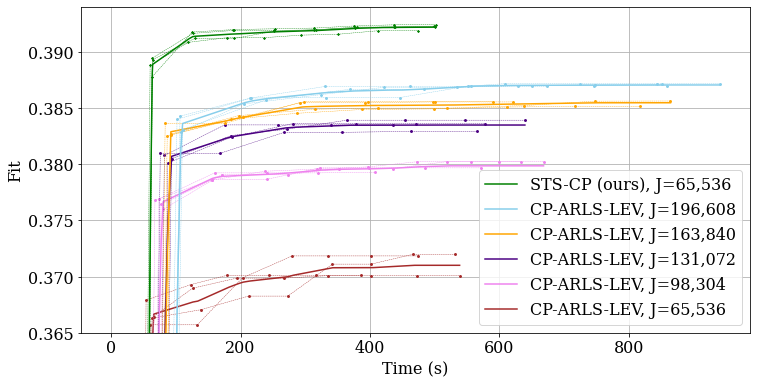

In [46]:
amazon_time_trace_files = [f'{DATA}/amazon-reviews_time_comparison1.json',
                           f'{DATA}/amazon-reviews_time_comparison2.json']
amazon_time_traces = get_data(amazon_time_trace_files)

amazon_efficient_files = [f'{DATA}/amazon-reviews_time_comparison_efficient.json']
amazon_efficient_traces = get_data(amazon_efficient_files)

def get_time_update_pairs(result):
    trace = result["trace"]
    order = result["tensor_order"]
    prefix_sum = np.cumsum(trace["update_times"])
    iterations = trace["iterations"]
    fits = np.maximum(trace["fits"], 0.0)
    max_fits = []
    fit_computation_epoch = iterations[1] - iterations[0]
    times = [0.0]
    for i in range(order * fit_computation_epoch, len(prefix_sum)+1, order * fit_computation_epoch):
        times.append(prefix_sum[i-1])
    
    for fit in fits:
        if len(max_fits) == 0 or max_fits[-1] < fit:
            max_fits.append(fit)
        else:
            max_fits.append(max_fits[-1])
    
    return times, max_fits

def filter_data(results, J):
    return [el for el in results if el["J"] == J]

dataset = amazon_time_traces
efficient_dataset = amazon_efficient_traces
J_values = sorted(list(dict.fromkeys([el['J'] for el in dataset])))
J_values_efficient = sorted(list(dict.fromkeys([el['J'] for el in efficient_dataset])))
colors={J_values[0]: 'brown', J_values[1]: 'violet', J_values[2]:'indigo', J_values[3]:'orange', J_values[4]:'skyblue'}
colors_efficient={J_values[0]: 'green'}

sf=1.5
fig, ax = plt.subplots(figsize=(8*sf,4*sf))
ax.grid(True)
ax.set_xlabel("Time (s)")
ax.set_ylabel("Fit")
ax.set_ylim(0.365, 0.394)

for J in J_values:
    results = filter_data(dataset, J)
    max_time = max([get_time_update_pairs(result)[0][-1] for result in results])
    x = np.linspace(0.0, max_time, num=10000)
    
    interp_y = []
    for result in results:
        times, fits = get_time_update_pairs(result)
        ax.plot(times, fits, '--o', linewidth=0.4, markersize=1.9, c=colors[J])
        interp_y.append(np.interp(x, times, fits))
    mean_y = np.mean(interp_y, axis=0)
    ax.plot(x, mean_y, c=colors[J],label=f"CP-ARLS-LEV, J={J:,}")
    
    
for J in J_values_efficient:
    results = filter_data(efficient_dataset, J)
    max_time = max([get_time_update_pairs(result)[0][-1] for result in results])
    x = np.linspace(0.0, max_time, num=10000)
    
    interp_y = []
    for result in results:
        times, fits = get_time_update_pairs(result)
        ax.plot(times, fits, '--*', linewidth=0.4, markersize=1.9, c=colors_efficient[J])
        interp_y.append(np.interp(x, times, fits))
    mean_y = np.mean(interp_y, axis=0)
    ax.plot(x, mean_y, c=colors_efficient[J],label=f"STS-CP (ours), J={J:,}")

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1])
fig.savefig("paper_images/amazon_time_plot.pdf",bbox_inches='tight')

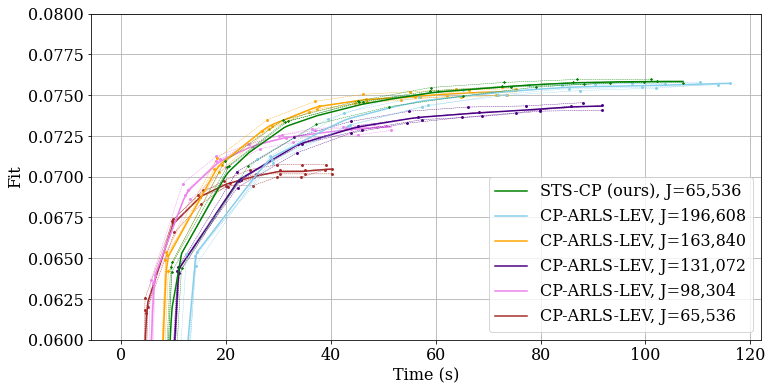

In [47]:
nell2_time_trace_files = [f'{DATA}/nell-2_time_comparison.json']
nell2_time_traces = get_data(nell2_time_trace_files)

nell2_efficient_files = [f'{DATA}/nell-2_time_comparison_efficient.json']
nell2_efficient_traces = get_data(nell2_efficient_files)

def get_time_update_pairs(result):
    trace = result["trace"]
    order = result["tensor_order"]
    prefix_sum = np.cumsum(trace["update_times"])
    iterations = trace["iterations"]
    fits = np.maximum(trace["fits"], 0.0)
    max_fits = []
    fit_computation_epoch = iterations[1] - iterations[0]
    times = [0.0]
    for i in range(order * fit_computation_epoch, len(prefix_sum)+1, order * fit_computation_epoch):
        times.append(prefix_sum[i-1])
    
    for fit in fits:
        if len(max_fits) == 0 or max_fits[-1] < fit:
            max_fits.append(fit)
        else:
            max_fits.append(max_fits[-1])
    
    return times, max_fits

def filter_data(results, J):
    return [el for el in results if el["J"] == J]

dataset = nell2_time_traces
efficient_dataset = nell2_efficient_traces
J_values = sorted(list(dict.fromkeys([el['J'] for el in dataset])))
J_values_efficient = sorted(list(dict.fromkeys([el['J'] for el in efficient_dataset])))
colors={J_values[0]: 'brown', J_values[1]: 'violet', J_values[2]:'indigo', J_values[3]:'orange', J_values[4]:'skyblue'}
colors_efficient={J_values[0]: 'green'}

sf=1.5
fig, ax = plt.subplots(figsize=(8*sf,4*sf))
ax.grid(True)
ax.set_xlabel("Time (s)")
ax.set_ylabel("Fit")
ax.set_ylim(0.06, 0.08)

for J in J_values:
    results = filter_data(dataset, J)
    max_time = max([get_time_update_pairs(result)[0][-1] for result in results])
    x = np.linspace(0.0, max_time, num=10000)
    
    interp_y = []
    for result in results:
        times, fits = get_time_update_pairs(result)
        ax.plot(times, fits, '--o', linewidth=0.4, markersize=1.9, c=colors[J])
        interp_y.append(np.interp(x, times, fits))
    mean_y = np.mean(interp_y, axis=0)
    ax.plot(x, mean_y, c=colors[J],label=f"CP-ARLS-LEV, J={J:,}")
    
    
for J in J_values_efficient:
    results = filter_data(efficient_dataset, J)
    max_time = max([get_time_update_pairs(result)[0][-1] for result in results])
    x = np.linspace(0.0, max_time, num=10000)
    
    interp_y = []
    for result in results:
        times, fits = get_time_update_pairs(result)
        ax.plot(times, fits, '--*', linewidth=0.4, markersize=1.9, c=colors_efficient[J])
        interp_y.append(np.interp(x, times, fits))
    mean_y = np.mean(interp_y, axis=0)
    ax.plot(x, mean_y, c=colors_efficient[J],label=f"STS-CP (ours), J={J:,}")

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1])
fig.savefig("paper_images/nell2_plot.pdf",bbox_inches='tight')

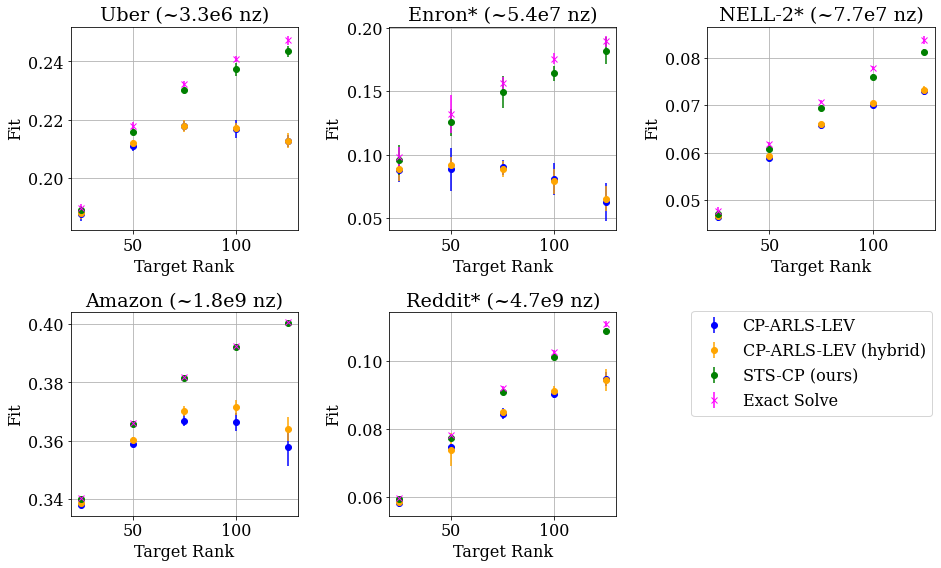

In [48]:
# Version of the figure for presentations

fig = plt.figure()
scale=3.0
fig.set_size_inches(5 * scale, 3.0 * scale)
spec = fig.add_gridspec(2, 3, hspace=0.4, wspace=0.4, left=0.0, right=0.8)
axs = [fig.add_subplot(spec[i, j]) for i in range(2) for j in range(3)]

for ax in axs:
    ax.set_ylabel("Fit")
    ax.set_xlabel("Target Rank")

#for i in range(1, 5):
#    axs[i].sharey(axs[0])
#    if i != 1 and i != 2:
#        axs[i].label_outer()
#    else:
#        plt.setp(axs[i].get_yticklabels(), visible=False)
    
for i in range(5):
    axs[i].grid(True)
    
axs[5].set_visible(False)

colormap = {"larsen_kolda": "blue", "larsen_kolda_hybrid": "orange", "efficient": "green", "exact": "magenta"}
symmap = {"larsen_kolda": "o", "larsen_kolda_hybrid": "o", "efficient": "o", "exact": "x"}

points = process_data(uber_data)
for key in points:
    entry = points[key]
    if key == "efficient":
        label="STS-CP (ours)"
    elif key == "larsen_kolda":
        label="CP-ARLS-LEV"
    elif key == "larsen_kolda_hybrid":
        label="CP-ARLS-LEV (hybrid)"
    elif key == "exact":
        label="Exact Solve"
    
    axs[0].errorbar(entry[1], entry[0], fmt=symmap[key], c=colormap[key], yerr=entry[2], label=label)
    axs[0].set_title("Uber (~3.3e6 nz)")

def plot_data(data, ax):
    points = process_data(data)
    for key in points:
        entry = points[key]
        ax.errorbar(entry[1], entry[0], fmt=symmap[key], c=colormap[key], yerr=entry[2])
   
plot_data(enron_data, axs[1])
axs[1].set_title("Enron* (~5.4e7 nz)")

plot_data(nell2_data, axs[2])
axs[2].set_title("NELL-2* (~7.7e7 nz)")        

plot_data(amazon_data, axs[3]) 
axs[3].set_title("Amazon (~1.8e9 nz)")
    
plot_data(reddit_data, axs[4])
axs[4].set_title("Reddit* (~4.7e9 nz)")

fig.legend(bbox_to_anchor=(0.805, 0.453), ncol=1)
fig.savefig("paper_images/spten_accuracies_presentation.pdf", bbox_inches='tight')
plt.show()

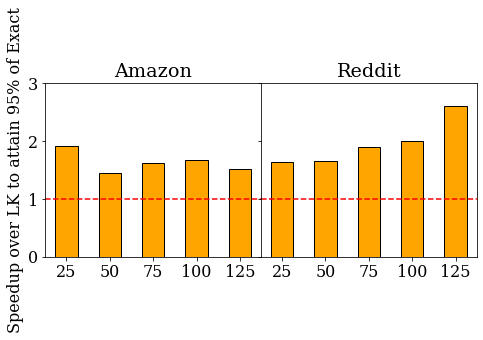

In [53]:
# Generates a table with all of the data from the accuracy comparison
data = {"uber": uber_data, 
        "enron": enron_data, 
        "nell-2": nell2_data, 
        "amazon-reviews": amazon_data, 
        "reddit-2015": reddit_data}

result = {}
for key in data:
    data[key] = process_data(data[key])
    
    means, ranks, stds = data[key]["exact"]
    sampler_dict = {}
    for i in range(len(means)):
        sampler_dict[ranks[i]] = means[i]
            
    result[key] = sampler_dict
    
rank_means = result

def get_time_update_pairs(result):
    trace = result["trace"]
    order = result["tensor_order"]
    prefix_sum = np.cumsum(trace["update_times"])
    iterations = trace["iterations"]
    fits = np.maximum(trace["fits"], 0.0)
    max_fits = []
    fit_computation_epoch = iterations[1] - iterations[0]
    times = [0.0]
    for i in range(order * fit_computation_epoch, len(prefix_sum)+1, order * fit_computation_epoch):
        times.append(prefix_sum[i-1])
    
    for fit in fits:
        if len(max_fits) == 0 or max_fits[-1] < fit:
            max_fits.append(fit)
        else:
            max_fits.append(max_fits[-1])
    
    return times, max_fits

def create_data_dictionary(traces):
    res = {}
    for trace in traces:
        key = trace['sampler'], trace['J'], trace['R']
        
        if key not in res:
            res[key] = []
            
        res[key].append(trace)
        
    return res

def create_interpolation(lst):
    max_time = max([get_time_update_pairs(result)[0][-1] for result in lst])
    x = np.linspace(0.0, max_time, num=10000)
    
    interp_y = []
    for result in lst:
        times, fits = get_time_update_pairs(result)
        interp_y.append(np.interp(x, times, fits))
    mean_y = np.mean(interp_y, axis=0)
    
    return x, mean_y

def find_crossover(interpolation, mean, threshold):
    lower_bound = mean * threshold
    insertion_point = np.searchsorted(interpolation[1], lower_bound, side='right')
    
    if insertion_point == len(interpolation[0]):
        return False, interpolation[0][-1], interpolation[1][-1]
    else:
        return True, interpolation[0][insertion_point], interpolation[1][insertion_point]

def process_folder(folder, tensor_name, threshold, ax, name):
    folder += tensor_name
    traces = []
    for file in os.listdir(folder):
        with open(os.path.join(folder, file), "r") as infile:
            trace = json.load(infile)
            traces.append(trace)
    
    data_dict = create_data_dictionary(traces)
    keys = list(data_dict.keys())
    
    samplers = ['larsen_kolda_hybrid', 'efficient']
    ranks = [25, 50, 75, 100, 125]
    
    lowest_times = {}
    sample_counts_tested = {}
    
    for sampler in samplers:
        for rank in ranks:
            filtered_keys = [key for key  in keys if key[0] == sampler and key[2] == rank]
            
            lowest_time = np.inf
            max_fit = 0
            exact_fit = rank_means[tensor_name][rank]
            
            sample_count_crossover = None
            sample_counts_tested[(sampler, rank)] = []
            
            for key in filtered_keys:
                data = data_dict[key]
                sample_counts_tested[(sampler, rank)].extend([el['J'] for el in data])
                interpolation = create_interpolation(data)
                crossover = find_crossover(interpolation, exact_fit, threshold)
                if crossover[2] > max_fit:
                    time_for_max_fit = crossover[1]
                
                max_fit = max(max_fit, crossover[2])
                if crossover[0]:
                    lowest_time = np.minimum(lowest_time, crossover[1])
                    sample_counts_crossover = data[0]['J'] / 2 ** 15
            
            if sampler not in lowest_times:
                lowest_times[sampler] = {}
                              
            lowest_times[sampler][rank] = lowest_time
            sample_counts_tested[(sampler, rank)] = sorted(list(set(sample_counts_tested[(sampler, rank)])))
            sample_counts_tested[(sampler, rank)] = [el / (2 ** 15) for el in sample_counts_tested[(sampler, rank)] ]
            
    ranks = [25, 50, 75, 100, 125]
    heights = []
    for rank in ranks:
        if lowest_times['larsen_kolda_hybrid'][rank] == np.inf or lowest_times['efficient'][rank] == np.inf:
            heights.append(0)
        else:
            heights.append(lowest_times['larsen_kolda_hybrid'][rank] / lowest_times['efficient'][rank])
            
    ax.bar(ranks, heights, width=13, linewidth=1, edgecolor='black', color='orange')
    ax.axhline(1.0, color="red", linestyle="--")
    ax.set_xticks(ranks)
    ax.set_title(f"{name}")
    ax.set_ylim(0, 3.0)


fig = plt.figure(tight_layout=True, figsize=(7,3.5))
gs = gridspec.GridSpec(1,2, wspace=0)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

for ax in [ax1, ax2]:
    ax.label_outer()
    
thresh=0.95
process_folder(f'{DATA}/speedup_experiments/', 'amazon-reviews', thresh, ax1, 'Amazon')
process_folder(f'{DATA}/speedup_experiments/', 'reddit-2015', thresh, ax2, 'Reddit')
fig.show()

#ax.set_xlabel("Rank")
ax1.set_ylabel(f"Speedup over LK to attain {int(thresh * 100)}% of Exact")

fig.savefig("paper_images/large_tensor_speedup.pdf", bbox_inches='tight')

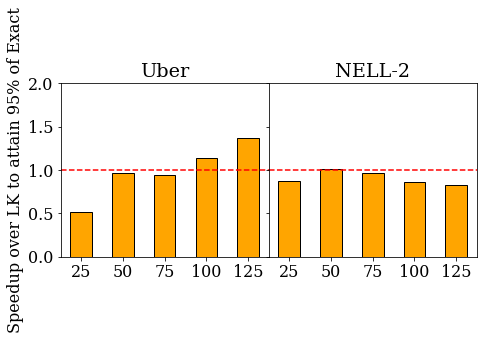

In [54]:
fig = plt.figure(tight_layout=True, figsize=(7,3.5))
gs = gridspec.GridSpec(1,2, wspace=0)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

for ax in [ax1, ax2]:
    ax.label_outer()
    
thresh=0.95    
process_folder(f'{DATA}/speedup_experiments/', 'uber', thresh, ax1, 'Uber')
process_folder(f'{DATA}/speedup_experiments/', 'nell-2', thresh, ax2, 'NELL-2')
fig.show()

ax1.set_ylim(0, 2)
ax2.set_ylim(0, 2)

#ax.set_xlabel("Rank")
ax1.set_ylabel(f"Speedup over LK to attain {int(thresh * 100)}% of Exact")
fig.savefig("paper_images/small_tensor_speedup.pdf", bbox_inches='tight')

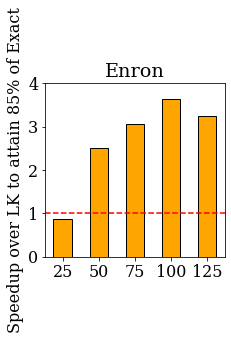

In [55]:
fig = plt.figure(tight_layout=True, figsize=(3.5,3.5))
gs = gridspec.GridSpec(1,1, wspace=0)

ax1 = fig.add_subplot(gs[0, 0])

for ax in [ax1]:
    ax.label_outer()
    
thresh=0.85    
process_folder(f'{DATA}/speedup_experiments/', 'enron', thresh, ax1, 'Enron')
ax.set_ylim([0, 4])
fig.show()

#ax.set_xlabel("Rank")
ax1.set_ylabel(f"Speedup over LK to attain {int(thresh * 100)}% of Exact")

fig.savefig("paper_images/enron_tensor_speedup.pdf", bbox_inches='tight')

In [57]:
# Generate a list of runtime per iteration for STS-CP

def process(folder, tensor_name):
    folder += tensor_name
    traces = []
    for file in os.listdir(folder):
        with open(os.path.join(folder, file), "r") as infile:
            trace = json.load(infile)
            traces.append(trace)
    
    data_dict = create_data_dictionary(traces)
    return data_dict

def get_iteration_time_pairs(result):
    trace = result["trace"]
    order = result["tensor_order"]
    prefix_sum = np.cumsum(trace["update_times"])
    iterations = trace["iterations"]
    fits = np.maximum(trace["fits"], 0.0)
    max_fits = []
    fit_computation_epoch = iterations[1] - iterations[0]
    times = [0.0]
    for i in range(order * fit_computation_epoch, len(prefix_sum)+1, order * fit_computation_epoch):
        times.append(prefix_sum[i-1])
    
    for fit in fits:
        if len(max_fits) == 0 or max_fits[-1] < fit:
            max_fits.append(fit)
        else:
            max_fits.append(max_fits[-1])
    
    return iterations, times

avg_times_per_iteration = {}

for tensor in ['uber', 'enron', 'nell-2', 'amazon-reviews', 'reddit-2015']:
    result = process(f'{DATA}/speedup_experiments/', tensor)
    iterations, times = get_iteration_time_pairs(result[('efficient', 65536, 25)][0])
    avg_times_per_iteration[tensor] = times[3] / iterations[3]
    
avg_times_per_iteration

{'uber': 0.22399071057637532,
 'enron': 0.4621296405792236,
 'nell-2': 0.5704191048940023,
 'amazon-reviews': 3.380168851216634,
 'reddit-2015': 25.971865765253703}

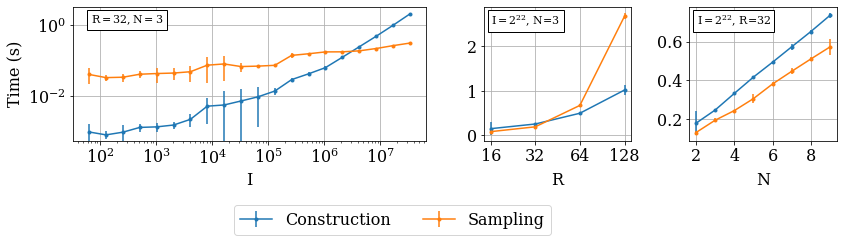

In [58]:
data = None
with open(f"{DATA}/runtime_bench.json") as f:
    data = json.load(f)

I_values = [el["I"] for el in data["I_trace"]]
I_con_times = [np.mean(el["construction_times"]) for el in data["I_trace"]]
I_sampling_times = [np.mean(el["sampling_times"]) for el in data["I_trace"]]
I_con_errs = np.array([np.std(el["construction_times"]) for el in data["I_trace"]])
I_sampling_errs = np.array([np.std(el["sampling_times"]) for el in data["I_trace"]])


R_values = [el["R"] for el in data["R_trace"]]
R_con_times = [np.mean(el["construction_times"]) for el in data["R_trace"]]
R_sampling_times = [np.mean(el["sampling_times"]) for el in data["R_trace"]]
R_con_errs = np.array([np.std(el["construction_times"]) for el in data["R_trace"]])
R_sampling_errs = np.array([np.std(el["sampling_times"]) for el in data["R_trace"]])

N_values = [el["N"] for el in data["N_trace"]]
N_con_times = [np.mean(el["construction_times"]) for el in data["N_trace"]]
N_sampling_times = [np.mean(el["sampling_times"]) for el in data["N_trace"]]
N_con_errs = np.array([np.std(el["construction_times"]) for el in data["N_trace"]])
N_sampling_errs = np.array([np.std(el["sampling_times"]) for el in data["N_trace"]])

fig = plt.figure(tight_layout=True, figsize=(12, 3))
gs = gridspec.GridSpec(1, 4)

ax = fig.add_subplot(gs[:, 0:2])
ax.set_xscale("log")
ax.set_yscale("log")
ax.grid(True)
ax.errorbar(I_values, I_con_times, 3 * I_con_errs, fmt='-o', label="Construction", markersize=3)
ax.errorbar(I_values, I_sampling_times, 3 * I_sampling_errs, fmt='-o', label="Sampling", markersize=3)
props = dict(boxstyle='square', facecolor='white', alpha=1.0)
ax.text(0.05, 0.95, '$\mathregular{R=32, N=3}$', transform=ax.transAxes, fontsize=11,
        verticalalignment='top',bbox=props)

ax.set_ylabel('Time (s)')
ax.set_xlabel('I')

for i in range(2):
    ax = fig.add_subplot(gs[0, i+2])
    ax.grid(True)
    if i == 0:
        ax.set_xscale('log')
        ax.errorbar(R_values, R_con_times, 3 * R_con_errs, fmt='-o', markersize=3)
        ax.errorbar(R_values, R_sampling_times, 3 * R_sampling_errs, fmt='-o', markersize=3)
        ax.set_xlabel('R')
        ax.set_xticks(R_values)
        ax.minorticks_off()
        ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
        ax.text(0.05, 0.95, '$\mathregular{I=2^{22}}$, N=3', transform=ax.transAxes, fontsize=11,
        verticalalignment='top',bbox=props)
    if i == 1:
        ax.text(0.05, 0.95, '$\mathregular{I=2^{22}}$, R=32', transform=ax.transAxes, fontsize=11,
        verticalalignment='top',bbox=props)
        ax.errorbar(N_values, N_con_times, 3 * N_con_errs, fmt='-o', markersize=3)
        ax.errorbar(N_values, N_sampling_times, 3 * N_sampling_errs, fmt='-o', markersize=3)
        ax.set_xticks([2, 4, 6, 8])
        ax.set_xlabel('N')
        
fig.align_labels()
fig.legend(bbox_to_anchor=(0.6585, 0.04), ncol=5)
fig.savefig("paper_images/runtime_benchmark_horizontal.pdf", bbox_inches='tight')
plt.show()